Bu kursta şimdiye kadar, sinir ağlarının regresyon problemlerini nasıl çözebileceğini öğrendik. Şimdi sinir ağlarını başka bir yaygın makine öğrenimi problemine uygulayacağız: sınıflandırma. Şimdiye kadar öğrendiğimiz hemen her şey hala geçerli. Ana fark, kullandığımız kayıp fonksiyonunda ve son katmanın ne tür çıktılar üretmesini istediğimizde.

# Binary Classification

İki sınıftan birine sınıflandırma, yaygın bir makine öğrenimi problemidir. Bir müşterinin satın alma yapma olasılığının olup olmadığını, bir kredi kartı işleminin sahte olup olmadığını, derin uzay sinyallerinin yeni bir gezegenin kanıtını gösterip göstermediğini veya bir tıbbi testin bir hastalığın kanıtını gösterip göstermediğini tahmin etmek isteyebilirsiniz. (You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease.) Bunların hepsi ikili sınıflandırma problemleridir.

Ham verilerinizde, sınıflar "Evet" ve "Hayır" veya "Köpek" ve "Kedi" gibi dizelerle temsil edilebilir. Bu veriyi kullanmadan önce bir sınıf etiketi atayacağız: bir sınıf 0 olacak ve diğeri 1 olacak. Sayısal etiketler atamak, veriyi bir sinir ağının kullanabileceği bir forma sokar.

**Accuracy ve Cross Entropy**

Accuracy, bir sınıflandırma problemindeki başarıyı ölçmek için kullanılan birçok metrikten biridir. Doğruluk(Accuracy), doğru tahminlerin toplam tahminlere oranıdır: Accuracy = doğru_sayısı / toplam. Her zaman doğru tahmin yapan bir modelin Accuracy skoru 1.0 olurdu. Diğer her şey eşit olduğunda, doğruluk, veri setindeki sınıflar yaklaşık aynı sıklıkta meydana geldiğinde kullanılması makul bir metriktir.

Doğruluğun(Accuracy) (ve çoğu diğer sınıflandırma metriğinin) sorunu, loss fonksiyonu olarak kullanılamamasıdır. SGD, yumuşak bir şekilde değişen bir kayıp fonksiyonuna ihtiyaç duyar, ancak Accuracy, sayımların bir oranı olduğu için "sıçramalarla" değişir. Bu nedenle, loss fonksiyonu olarak hareket edecek bir ikame(substitute) seçmemiz gerekiyor. Bu ikame(substitute), cross entropy fonksiyonudur.

Şimdi, loss fonksiyonunun eğitim sırasında ağın hedefini tanımladığını hatırlayın. Regresyonda, amacımız beklenen sonuç ile tahmin edilen sonuç arasındaki mesafeyi minimize etmekti. Bu mesafeyi ölçmek için MAE'yi seçtik.

Sınıflandırma için bunun yerine istediğimiz şey, olasılıklar arasında bir mesafedir ve cross entropi bunu sağlar. Çapraz entropi, bir olasılık dağılımından diğerine olan mesafenin bir tür ölçüsüdür.

![](image19.png)

Fikir şu ki, ağımızın doğru sınıfı 1.0 olasılıkla tahmin etmesini istiyoruz. Tahmin edilen olasılık 1.0'dan ne kadar uzaksa, çapraz entropi kaybı o kadar büyük olacaktır.

Çapraz entropiyi kullanmamızın teknik nedenleri biraz inceliklidir, ancak bu bölümden çıkarmanız gereken ana şey şudur: sınıflandırma kaybı için çapraz entropiyi kullanın; ilgilenebileceğiniz diğer metrikler (doğruluk gibi) genellikle onunla birlikte iyileşme eğiliminde olacaktır.

**Making Probabilities with the Sigmoid Function**

Çapraz entropi ve accuracy fonksiyonlarının her ikisi de girdi olarak olasılıklara ihtiyaç duyar, yani 0 ile 1 arasındaki sayılara. Yoğun bir katmanın ürettiği gerçek değerli çıktıları olasılıklara dönüştürmek için, yeni bir tür aktivasyon fonksiyonu olan sigmoid aktivasyonunu ekliyoruz.

![](image20.png)

![image.png](image21.png)

# Example

The Ionosphere dataset contains features obtained from radar signals focused on the ionosphere layer of the Earth's atmosphere. The task is to determine whether the signal shows the presence(varlık, mevcudiyet) of some object, or just empty air. (Görev, sinyalin bir nesnenin varlığını mı yoksa sadece boş havayı mı gösterdiğini belirlemektir.)

In [4]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/Data-Science-and-Machine-Learning-Tutorial/Datasets/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a 'sigmoid' activation so that the model will produce class probabilities.

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[33]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

c:\Users\Alperen Arda\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [13]:
early_stopping = keras.callbacks.EarlyStopping(
    patience= 10,
    min_delta= 0.000001,
    restore_best_weights= True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0,
)

Her zaman olduğu gibi öğrenme eğrilerine bakacağız ve ayrıca doğrulama setinde elde ettiğimiz kayıp ve doğruluk için en iyi değerleri inceleyeceğiz. (Erken durdurmanın, bu değerleri elde eden ağırlıklara geri döneceğini unutmayın.)

Best Validation Loss: 0.1268
Best Validation Accuracy: 0.9619


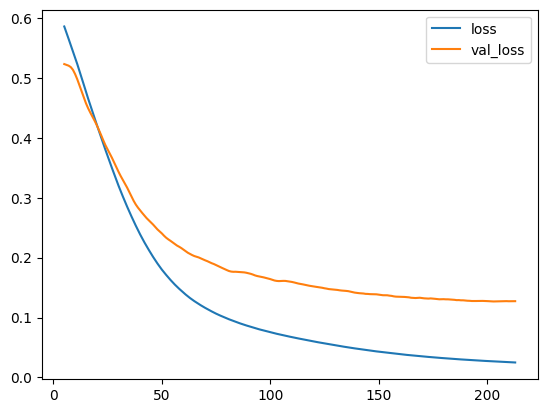

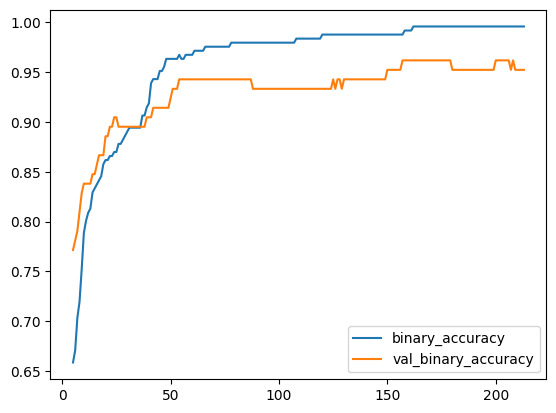

In [14]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))